In [3]:
import nltk
from nltk.corpus import words
import pandas as pd
import numpy as np
from collections import defaultdict

In [4]:
wordss = words.words()

In [5]:
fives = []
for i in wordss:
    if len(i) == 5:
        fives.append(i)

In [6]:
pd.DataFrame(fives).to_csv('words.csv')
words = pd.read_csv('words.csv')
words = words.drop(columns = {'Unnamed: 0'})
words = words['0']

In [7]:
new_words = []
for i in words:
    if i[0].islower():
        new_words.append(i)

In [8]:
pd.DataFrame(new_words).to_csv('words.csv')

In [9]:
words = pd.read_csv('words.csv')
words = words.drop(columns = {'Unnamed: 0'})
words = words['0']

In [10]:
letter_distributions = {}
letter_distributions['a'] = 0
letter_distributions['b'] = 0
letter_distributions['c'] = 0
letter_distributions['d'] = 0
letter_distributions['e'] = 0
letter_distributions['f'] = 0
letter_distributions['g'] = 0
letter_distributions['h'] = 0
letter_distributions['i'] = 0
letter_distributions['j'] = 0
letter_distributions['k'] = 0
letter_distributions['l'] = 0
letter_distributions['m'] = 0
letter_distributions['n'] = 0
letter_distributions['o'] = 0
letter_distributions['p'] = 0
letter_distributions['q'] = 0
letter_distributions['r'] = 0
letter_distributions['s'] = 0
letter_distributions['t'] = 0
letter_distributions['u'] = 0
letter_distributions['v'] = 0
letter_distributions['w'] = 0
letter_distributions['x'] = 0
letter_distributions['y'] = 0
letter_distributions['z'] = 0

In [11]:
for word in words:
    for let in word:
        letter_distributions[let] = letter_distributions[let] + 1

In [12]:
let_counts = pd.DataFrame.from_records(letter_distributions, index = [0]).T

(array([4543., 1181., 1585., 1426., 4377.,  680., 1129., 1373., 2634.,
         166.,  900., 2420., 1323., 2258., 2858., 1321.,   88., 3125.,
        2452., 2455., 1914.,  477.,  703.,  191., 1616.,  250.]),
 array([ 0.        ,  0.96153846,  1.92307692,  2.88461538,  3.84615385,
         4.80769231,  5.76923077,  6.73076923,  7.69230769,  8.65384615,
         9.61538462, 10.57692308, 11.53846154, 12.5       , 13.46153846,
        14.42307692, 15.38461538, 16.34615385, 17.30769231, 18.26923077,
        19.23076923, 20.19230769, 21.15384615, 22.11538462, 23.07692308,
        24.03846154, 25.        ]),
 <BarContainer object of 26 artists>)

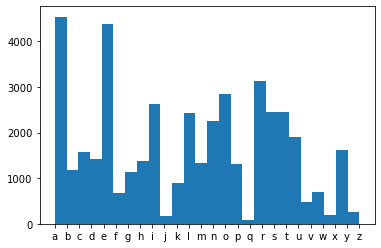

In [13]:
import matplotlib.pyplot as plt
val, weight = zip(*[(k, v) for k,v in letter_distributions.items()])
plt.hist(val, weights=weight, bins = 26)

In [14]:
let_counts.loc['a'].values

array([4543])

In [35]:
running = True
word = [0,0,0,0,0]
guess = 'peels'
hints = 'nynnn'

#while running == True:
pos = 0
yellow = []
used = []

for let in hints:
    if let == 'g':
        word[pos] = guess[pos]
    if let == 'y':
        yellow.append(guess[pos])
    if let == 'n':
        used.append(guess[pos])
    pos += 1

#potential_words = find_potential_words(potens, used, word, words)
#print('Potential words:', len(potential_words))

#find_probs(let_counts, potential_words)

def find_potential_words(yellow, used, word, words):
    count = 0
    for letter in word:
        if letter == 0:
            count += 1
    if count == 5:
        no_green_temp = []
        for word in words:
            for letter in word:
                if (letter not in used) or (letter in yellow):
                    if word not in no_green_temp:
                        no_green_temp.append(word)

        return no_green_temp
    
    else:
        #get all words with green letters
        first_temp = []
        
        for letter in word: 
            position = 0
            if letter != 0:
                for w in words:
                    if letter == w[position]:
                        first_temp.append(w)

            position += 1

        #Trim unuseful words
        second_temp = []
        for word in first_temp:
            for letter in word:
                if (letter not in used) or (letter in yellow):
                    second_temp.append(word)

        return second_temp

def find_probs(let_counts, potential_words):
    word_counts = []

    for word in potential_words:
        t_val = 0

        for letter in word:
            t_val += let_counts.loc[letter].values
        word_counts.append([word,t_val])

    guesses = pd.DataFrame(word_counts)
    guesses['Letter Frequency'] = guesses[1].apply(lambda x : int(x))
    guesses = guesses.sort_values(by = 'Letter Frequency', ascending = False)
    guesses = guesses.drop(columns = {1})
    guesses = guesses.rename(columns = {0:'Word'})
    print(guesses.head(50))
          

In [36]:
running = True
word = [0,0,0,0,0]
guess = 'xxxxx'
hints = 'nnnnn'

#while running == True:
pos = 0
yellow = []
used = []

for let in hints:
    if let == 'g':
        word[pos] = guess[pos]
    if let == 'y':
        yellow.append(guess[pos])
    if let == 'n':
        used.append(guess[pos])
    pos += 1
    
print(yellow, used, word)

[] ['x', 'x', 'x', 'x', 'x'] [0, 0, 0, 0, 0]


In [37]:
potential_words = find_potential_words(yellow, used, word, words)

len(potential_words)

8497

In [38]:
find_probs(let_counts, potential_words)

       Word  Letter Frequency
413   arara             19879
423   arear             19713
5778  reree             19381
122   aerie             19056
7205  tarea             19043
5671  reaal             19008
422   areal             19008
2309  eerie             18890
7248  teaer             18877
430   arete             18877
2288  eater             18877
2286  easer             18874
2406  erase             18874
426   arena             18846
343   anear             18846
425   areel             18842
5724  reese             18708
5786  resee             18708
2421  esere             18708
452   arnee             18680
2308  eeler             18676
558   aurae             18502
208   alala             18469
485   asana             18339
51    acara             18339
409   araca             18339
214   alate             18338
484   asale             18335
7252  tease             18204
6256  setae             18204
8404  yeara             18204
454   aroar             18194
2322  elat

In [4]:
count = 3

first_temp = []
word = [0, 'o', 0, 0, 'o']
used = ['r', 'e', 'a', 'd', 'y', 't']
yellow = ['l']


pos = 0
for tword in words:
    green_count = 0

    for i in range(len(tword)):
        
        if word[i] == tword[i]:
            
            green_count += 1
            
    if green_count == (5-count):
        first_temp.append(tword)

    
print(first_temp)
#Trim unuseful words
second_temp = []

for w in first_temp:
    if all(x in list(w) for x in yellow):
        second_temp.append(w)
            
            
print(second_temp)

third_temp = []

for ws in second_temp:
    if any(x in list(ws) for x in used):
        pass
    else:
        third_temp.append(ws)
        
third_temp

TypeError: 'LazyCorpusLoader' object is not iterable

In [322]:
test = ['b', 0,0,'a', 'd']
first_temp = []
count = 2
green_count = 0
aword = 'bread'


for i in range(5):

    if test[i] == list('bread')[i]:

        print(i)

        green_count += 1
        #print(green_count)
if green_count == (5-count):
    first_temp.append(aword)

0
3
4


In [323]:
first_temp

['bread']

In [337]:
word = [0, 'o', 0, 0, 'o']


'o'

In [5]:
def find_potential_words(yellow, used, word, words):
    count = 0
    for letter in word:
        if letter == 0:
            count += 1
    if count == 5:
        
        no_green_temp = []
        for word in words:
            for letter in word:
                if (letter not in used) or (letter in yellow):
                    if word not in no_green_temp:
                        no_green_temp.append(word)

        return no_green_temp
    
    else:
        #get all words with green letters
    
        first_temp = []

        for w in words: 
            for i in range(len(w)):
                if word[i] == w[i]:
                    first_temp.append(w)
    
        #Trim unuseful words
        second_temp = []
        for word in first_temp:
            for letter in word:
                if (letter not in used) or (letter in yellow):
                    second_temp.append(word)
                    break

        return second_temp

def find_probs(let_counts, potential_words):
    word_counts = []

    for word in potential_words:
        t_val = 0

        for letter in word:
            t_val += let_counts.loc[letter].values
        word_counts.append([word,t_val])

    guesses = pd.DataFrame(word_counts)
    print(guesses)
    guesses['Letter Frequency'] = guesses[1].apply(lambda x : int(x)/43445)
    guesses = guesses.sort_values(by = 'Letter Frequency', ascending = False)
    guesses = guesses.drop(columns = {1})
    guesses = guesses.rename(columns = {0:'Word'})
    print(guesses.head())

In [100]:
import nltk
from nltk.corpus import words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def find_potential_words(yellow, used, word, words):
    count = 0
    for letter in word:
        if letter == 0:
            count += 1
            
    if count == 5:
        
        second_temp = []
        for w in words:
            if all(x in list(w) for x in yellow):
                second_temp.append(w)
        
        third_temp = []

        for ws in second_temp:
            if not any(x in list(ws) for x in used):
                third_temp.append(ws)
                
       
        return third_temp
    
    else:
        first_temp = []
        
        for tword in words:
            green_count = 0

            for i in range(len(tword)):

                if word[i] == tword[i]:

                    green_count += 1

            if green_count == (5-count):
                first_temp.append(tword)

        #Trim unuseful words
        second_temp = []

        for w in first_temp:
            if all(x in list(w) for x in yellow):
                second_temp.append(w)

        third_temp = []

        for ws in second_temp:
            if any(x in list(ws) for x in used):
                pass
            else:
                third_temp.append(ws)

     
        
        return third_temp

def find_probs(let_counts, potential_words):
    word_counts = []

    for word in potential_words:
        t_val = 0

        for letter in word:
            t_val += let_counts.loc[letter].values
        word_counts.append([word,t_val])

    
    guesses = pd.DataFrame(word_counts)
    guesses['Letter Frequency'] = guesses[1].apply(lambda x : int(x)/43445)
    guesses = guesses.sort_values(by = 'Letter Frequency', ascending = False)
    guesses = guesses.drop(columns = {1})
    guesses = guesses.rename(columns = {0:'Word'})
    print(guesses.head(10))
    
    return guesses

          




words = pd.read_csv('words.csv')
words = words.drop(columns = {'Unnamed: 0'})
words = words['0']

letter_distributions = {}
letter_distributions['a'] = 0
letter_distributions['b'] = 0
letter_distributions['c'] = 0
letter_distributions['d'] = 0
letter_distributions['e'] = 0
letter_distributions['f'] = 0
letter_distributions['g'] = 0
letter_distributions['h'] = 0
letter_distributions['i'] = 0
letter_distributions['j'] = 0
letter_distributions['k'] = 0
letter_distributions['l'] = 0
letter_distributions['m'] = 0
letter_distributions['n'] = 0
letter_distributions['o'] = 0
letter_distributions['p'] = 0
letter_distributions['q'] = 0
letter_distributions['r'] = 0
letter_distributions['s'] = 0
letter_distributions['t'] = 0
letter_distributions['u'] = 0
letter_distributions['v'] = 0
letter_distributions['w'] = 0
letter_distributions['x'] = 0
letter_distributions['y'] = 0
letter_distributions['z'] = 0

for word in words:
    for let in word:
        letter_distributions[let] = letter_distributions[let] + 1

let_counts = pd.DataFrame.from_records(letter_distributions, index = [0]).T

running = True
word = [0,0,0,0,0]
used = []
yellow = []
hints = 'yyngg'
guess = 'tears'
yellow_pos = {}
yellow_pos['0'] = []
yellow_pos['1'] = []
yellow_pos['2'] = []
yellow_pos['3'] = []
yellow_pos['4'] = []

#while running = True:
    #guess = str(input("Enter your guess in lowercase! "))
    #hints = str(input("Enter your hint results in the form: ynygn (Yellow, None, Green) "))
pos = 0
used_words = []
used_hints = []
used_words.append(guess)
used_hints.append(hints)

for let in hints:
    print(let,pos)
    if let == 'g':
        word[pos] = guess[pos]
    if let == 'y':
        yellow.append(guess[pos])
        yellow_pos[str(pos)] = guess[pos]
        
    if let == 'n' and let not in yellow:
        used.append(guess[pos])
    
    pos += 1
    

potential_words = find_potential_words(yellow, used, word, words)
print('Potential words:', len(potential_words))

potential_words = pruneYellow(used_words, used_hints, potential_words, yellow_pos)

guesses = find_probs(let_counts, potential_words)


if len(guesses) == 1:
    running = False


count = 0
for letter in word:
    if letter != 0:
        count += 1
    if count == 5:
        running = False


y 0
y 1
n 2
g 3
g 4
Potential words: 0


AttributeError: 'str' object has no attribute 'append'

In [29]:
used = ['x']
any(x in list('bread') for x in used)

False

In [ ]:
yellow_pos = {}
yellow_pos['0'] = []
yellow_pos['1'] = []
yellow_pos['2'] = []
yellow_pos['3'] = []
yellow_pos['4'] = []

used_words = ['bread']
used_hints = ['nnnyn']

potential_words = find_potential_words(yellow, used, word, words)
pruneYellow(used_words, used_hints, words, yellow_pos)

In [103]:
def pruneYellow(used_words, used_hints, potential_words, yellow_pos):
    
    res = []
    yellow_pos['0'].append('z')
    yellow_pos['0'].append('t')
    
    for w in potential_words:
        t = 0
       
        for letter in w:
            
            if letter in yellow_pos.values():
                if letter not in yellow_pos[str(t)]:
                    res.append(w)
                    break
                else:
                    pass
            else:
                res.append(w)
                
            t += 1
    result = []
    [result.append(x) for x in res if x not in result]
    return result



In [99]:
potential_words

[]